In [10]:
!pip install snownlp


Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.doubanio.com/simple
     ---------------------------------------- 0.0/37.6 MB ? eta -:--:--
     -- ------------------------------------- 2.1/37.6 MB 13.0 MB/s eta 0:00:03
     ----- ---------------------------------- 4.7/37.6 MB 11.9 MB/s eta 0:00:03
     ------- -------------------------------- 7.3/37.6 MB 11.9 MB/s eta 0:00:03
     ---------- ----------------------------- 9.4/37.6 MB 11.7 MB/s eta 0:00:03
     ---------- ---------------------------- 10.5/37.6 MB 10.9 MB/s eta 0:00:03
     ------------ --------------------------- 11.8/37.6 MB 9.5 MB/s eta 0:00:03
     ------------- -------------------------- 12.6/37.6 MB 8.8 MB/s eta 0:00:03
     -------------- ------------------------- 13.6/37.6 MB 8.5 MB/s eta 0:00:03
     --------------- ------------------------ 14.4/37.6 MB 7.9 MB/s eta 0:00:03
     ---------------- ----------------------- 15.2/37.6 MB 7.5 MB/s eta 0:00:

DEPRECATION: Loading egg at c:\programdata\anaconda3\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [11]:
!pip install --upgrade pip --no-warn-script-location


Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.doubanio.com/simple


DEPRECATION: Loading egg at c:\programdata\anaconda3\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [12]:
from snownlp import SnowNLP

# 测试情感分析
s = SnowNLP("我今天心情很好！")
print(s.sentiments)  # 输出情感分析结果===测试


0.7757338802735868


In [8]:
import pandas as pd
import re
import random

# 读取评论数据 CSV 文件
comments_df = pd.read_csv('comments.csv')  # 替换为你的 CSV 文件名

# 定义一些中立句子
neutral_sentences = [
    "这个产品还可以。",
    "评论没有更多详细内容。",
    "暂时没有意见。",
    "一般般，没有特别感受。",
    "这个还需要再看看。"
]

# 定义数据清洗函数
def clean_text(text):
    if not isinstance(text, str):
        return text

    # 1. 清除表情
    emoji_pattern = re.compile(
        "["
        u"\U0001F600-\U0001F64F"  # 表情符号
        u"\U0001F300-\U0001F5FF"  # 符号 & 标志
        u"\U0001F680-\U0001F6FF"  # 运输 & 地标
        u"\U0001F1E0-\U0001F1FF"  # 国旗
        "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)

    # 2. 清除 URL
    url_pattern = re.compile(r'http[s]?://\S+|www\.\S+')
    text = url_pattern.sub(r'', text)

    # 3. 将“求”替换为“好”
    text = text.replace("求", "好")

    # 4. 删除所有括号及其内容
    bracket_pattern = re.compile(r'\[.*?\]|\(.*?\)|\{.*?\}|\【.*?\】')
    text = bracket_pattern.sub(r'', text)
    
    return text

# 应用清洗函数并替换 content 列
comments_df['content'] = comments_df['content'].apply(clean_text)

# 检查清洗后的 content 列是否为空或非字符串，如果为空或非字符串则随机替换为中立句子
comments_df['content'] = comments_df['content'].apply(lambda x: random.choice(neutral_sentences) if not isinstance(x, str) or x.strip() == '' else x)

# 保存清洗后的数据为新文件，命名为 'cleaned_comments.csv'
comments_df.to_csv('cleaned_comments.csv', index=False, encoding='utf-8-sig')

# 打印前几行检查结果
print(comments_df.head())


                 comment_id    create_time ip_location  \
0  6447d0e80000000015023333  1682428136000         NaN   
1  645c4bc40000000017007bb8  1683770308000         NaN   
2  644746710000000018039d27  1682392689000         NaN   
3  655f2c450000000032034ccf  1700736069000         NaN   
4  644960050000000006020fc8  1682530309000         NaN   

                    note_id  \
0  644085280000000027000968   
1  644085280000000027000968   
2  644085280000000027000968   
3  644085280000000027000968   
4  644085280000000027000968   

                                             content  \
0                          Stable diffusion的最大特色没说出来   
1  目前所谓的ai创作，其实是通过网络窃取数亿优秀艺术作品作为训练数据才能生成作品的。这种不尊重...   
2                                               收费吗？   
3  问就是stable  diffusion最好，上限高，mj下限高，但是上限低，且收费离谱，m...   
4                                            都是需要收费的   

                    user_id  nickname  \
0  5bbc09b0219cd90001f0ae6b     苏打斯涅の   
1  611070f0000000000100b67a        微末   
2  6

In [10]:
import pandas as pd
from snownlp import SnowNLP

# 加载评论和作品数据
comments_df = pd.read_csv('cleaned_comments.csv')  # 替换为您的评论数据文件名
contents_df = pd.read_csv('contents.csv')  # 替换为您的作品数据文件名

# 定义情感分类函数
def classify_sentiment(text):
    # 过滤空字符串和无效输入
    if not isinstance(text, str) or text.strip() == '':
        return "neutral"  # 将空白评论或无效输入视为“中立”
    s = SnowNLP(text)
    score = s.sentiments
    if score > 0.6:
        return "positive"
    elif score < 0.4:
        return "negative"
    else:
        return "neutral"

# 合并评论数据和作品数据，使用 note_id 作为键
merged_df = pd.merge(comments_df, contents_df, on='note_id', how='left')

# 将非字符串类型的内容转换为字符串，并处理 NaN 值
merged_df['content'] = merged_df['content'].fillna('').astype(str)

# 应用情感分类到每个评论
merged_df['sentiment_class'] = merged_df['content'].apply(classify_sentiment)

# 选择需要的列并保持原始的列名
final_df = merged_df[['note_id', 'content', 'sentiment_class', 'last_modify_ts_y', 'create_time', 
                      'type', 'liked_count', 'comment_count']]

# 保存结果为新的 CSV 文件，使用 utf-8-sig 编码
final_df.to_csv('sentiment_analysis_results.csv', index=False, encoding='utf-8-sig')

# 打印前几行结果以检查
print(final_df.head())


                    note_id  \
0  644085280000000027000968   
1  644085280000000027000968   
2  644085280000000027000968   
3  644085280000000027000968   
4  644085280000000027000968   

                                             content sentiment_class  \
0                          Stable diffusion的最大特色没说出来         neutral   
1  目前所谓的ai创作，其实是通过网络窃取数亿优秀艺术作品作为训练数据才能生成作品的。这种不尊重...        positive   
2                                               收费吗？        negative   
3  问就是stable  diffusion最好，上限高，mj下限高，但是上限低，且收费离谱，m...        negative   
4                                            都是需要收费的        negative   

   last_modify_ts_y    create_time    type liked_count  comment_count  
0     1726237235016  1682428136000  normal        3.8万            537  
1     1726237235016  1683770308000  normal        3.8万            537  
2     1726237235016  1682392689000  normal        3.8万            537  
3     1726237235016  1700736069000  normal        3.8万            537  
4     1726237235016 

In [13]:
# 导入需要的库
import pandas as pd

# 读取 CSV 文件
df = pd.read_csv('sentiment_analysis_results.csv')

# 统计情感分类的分布
sentiment_distribution = df['sentiment_class'].value_counts()
print(sentiment_distribution)



sentiment_class
positive    6054
negative    3025
neutral     2401
Name: count, dtype: int64


In [14]:
# 将 'liked_count' 转换为数值，去除 '万' 等单位
df['liked_count'] = df['liked_count'].apply(lambda x: float(str(x).replace('万', '')) * 10000 if '万' in str(x) else float(x))

# 计算不同情感分类下的平均点赞数和评论数
average_likes = df.groupby('sentiment_class')['liked_count'].mean()
average_comments = df.groupby('sentiment_class')['comment_count'].mean()

print("Average Likes by Sentiment Class:")
print(average_likes)

print("\nAverage Comments by Sentiment Class:")
print(average_comments)


Average Likes by Sentiment Class:
sentiment_class
negative    4174.028099
neutral     4712.450229
positive    2861.281467
Name: liked_count, dtype: float64

Average Comments by Sentiment Class:
sentiment_class
negative    1162.721983
neutral      960.760933
positive    1056.120581
Name: comment_count, dtype: float64


In [15]:
# 分组统计不同作品类型下的情感分类分布
type_sentiment_distribution = df.groupby('type')['sentiment_class'].value_counts().unstack()
print(type_sentiment_distribution)


sentiment_class  negative  neutral  positive
type                                        
normal               2997     2373      5927
video                  28       28       127


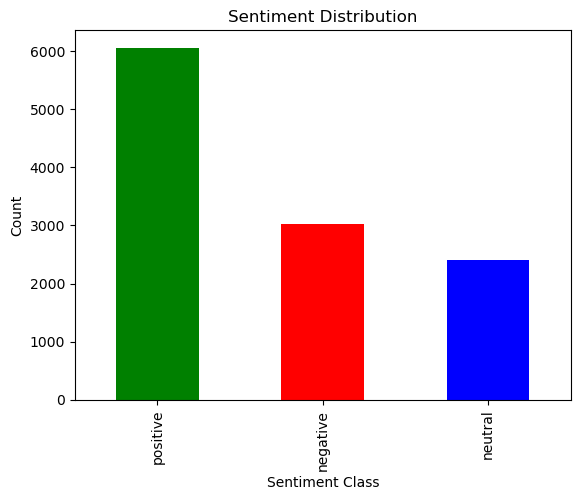

In [16]:
import matplotlib.pyplot as plt

# 绘制情感分类分布的柱状图
sentiment_distribution.plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Class')
plt.ylabel('Count')
plt.show()
